# Projekt Zaliczeniowy Modelowanie w Naukach o Ziemi

Projekt jest na ocenę. Rezultatem ma być kompletne sprawozdanie. Sprawozdania w formacie pdf przesyłamy w terminie do ostatniego dnia semestru.

Dane do projektu: `plik daily_ice_edge.csv`.

### Krok 0

1. Po przemyśleniu układu danych narysować kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów. 

  a. Przemyśleć układ danych
  
  b. Narysować kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów

Warto zapoznać się z kształtem Antarktydy.   

### Krok 1
  
1. Dla wszystkich kątów (dla każdego z osobna) znaleźć model matematyczny zasięgu lodu w funkcji czasu. 

  a. Zbudować model matematyczny dla każdej kolumny w oparciu o funkcji trygonometryczne (sinusoidalna cykliczność; można o to zapytać).

Uwaga na próbkowanie w czasie oraz na fakt, że czasami lodu morskiego dla danego kąta może nie być. 

### Krok 2
  
1. Stworzyć animację przedstawiającą zmianę w czasie zarówno rzeczywistego jak i wymodelowane.

### Krok 3
 
1. Zaproponować i *w miarę możliwości* obliczyć model zasięgu lodu biorący pod uwagę wszystkie dane na raz (`f(Lat, Lon, t)`).

  a. Przekonać, że świta nam w głowie jakaś idea.

## Wskazówki 

Można zbudować model bazując na sinusach i cosinusach dla każdego kierunku z osobna. Po powtórzeniu dla wszystkich azymutów pojawi się macierz, którą animujemy.

Po narysowaniu minimalnego zasięgu lodu w układzie biegunowym otrzymamy minimalny zasięg lodu przypominający kształt Antarktydy. Uzyskujemy to poprzez znalezienie minimalnej wartości w każdej kolumnie i narysowanie tego w układzie biegunowym.


In [1]:
# install.packages("ggplot2") # nolint: commented_code_linter.
# install.packages("animation") # nolint: commented_code_linter.
library(ggplot2)
library(animation)


## Dane do projektu

Plik `daily_ice_edge.csv` zawiera informację o zasięgu lodu morskiego wokół Antarktydy dla wszystkich długości geograficznych - w formacie długość-szerokość - na przestrzeni wielu lat. Dane są zapisane w formie macierzy, gdzie wiersze odpowiadają szerokości geograficznej, a kolumny długości geograficznej.

In [2]:
daily_ice_edge <- read.csv(
  "./data/daily_ice_edge.csv"
)
# 1591 wiersz -> zaczynaja się dane codzienne


In [3]:
# View(daily_ice_edge) # nolint: commented_code_linter.
# View(daily_open_water) # nolint: commented_code_linter.

## Minimalny zasięg lodu na Antarktydzie

Kontur przedstawiający minimalny zasięg lodu w analizowanym okresie dla wszystkich kątów

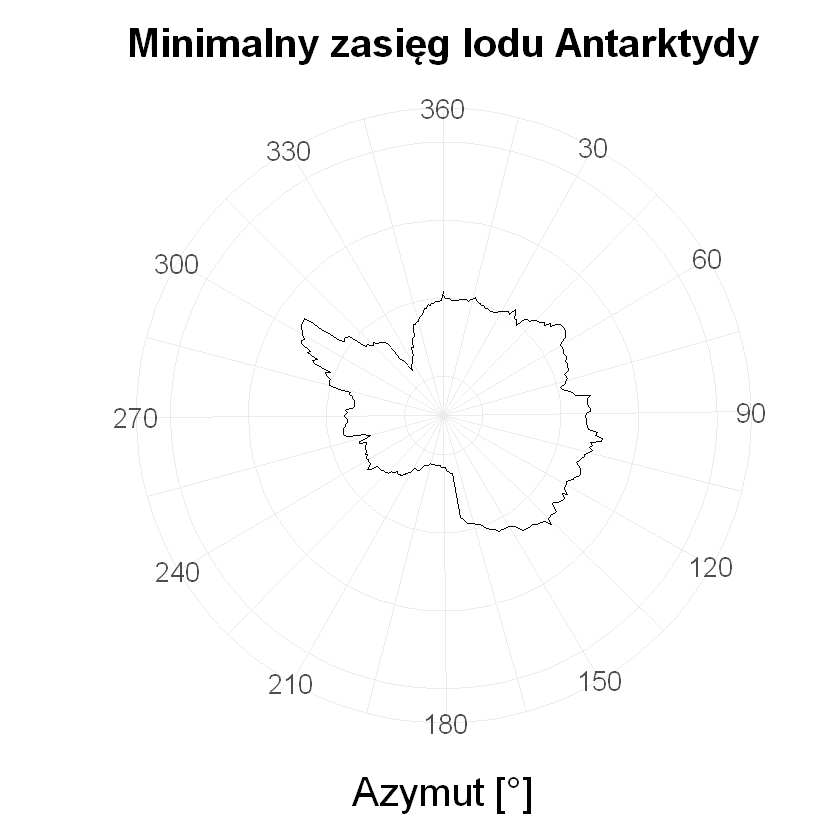

In [4]:
ice_edge_colnum <- length(colnames(daily_ice_edge))

ice_edge_min <- c()
open_water_min <- c()

for (i in 2:(ice_edge_colnum - 1)) {
  ice_edge_min[i - 1] <- min(daily_ice_edge[, i], na.rm = TRUE)
}
ice_edge_min <- as.data.frame(ice_edge_min)

ggplot(
  data = ice_edge_min, aes(x = seq_along(ice_edge_min), y = ice_edge_min)
) +
  geom_line() +
  coord_polar() +
  theme_minimal() +
  ylim(-85, -50) +
  labs(
    title = "Minimalny zasięg lodu Antarktydy",
    x = "Azymut [°]", y = ""
  ) +
  scale_x_continuous(breaks = seq(0, 360, 30)) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.text.y = element_blank(),
    axis.title = element_text(size = 24),
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5),
    plot.margin = unit(c(16, 16, 16, 16), "pt")
  )

In [9]:

step <- 500

sequence <- seq(from = 1, to = nrow(daily_ice_edge), by = step)

saveGIF(
  for (i in sequence) {
    day1 <- t(daily_ice_edge[i, ])

    start_index <- 2
    end_index <- 361

    angles <- c()
    for (j in seq(start_index, end_index, 1)) angles[j] <- day1[j]

    angles <- as.data.frame(angles)
    values <- as.numeric(angles[2:361, ])
    angles <- as.numeric(seq(start_index, end_index, 1))

    df <- data.frame(angles = angles, values = values)
    plt <- ggplot(data = df, aes(x = angles, y = values)) +
      geom_line() +
      coord_polar() +
      theme_minimal() +
      ylim(-85, -50) +
      labs(
        title = paste("Zasięg lodu na Antarktydzie dnia ", format(daily_ice_edge$Date[i])),
        x = "Azymut [°]", y = ""
      ) +
      scale_x_continuous(breaks = seq(0, 360, 30)) +
      theme(
        axis.text.x = element_text(size = 16),
        axis.text.y = element_blank(),
        axis.title = element_text(size = 24),
        plot.title = element_text(size = 32, face = "bold", hjust = 0.5),
        plot.margin = unit(c(16, 16, 16, 16), "pt")
      )
    print(plt)
  },
  movie.name = "animation.gif", interval = 0.2,
  ani.width = 800, ani.height = 800
)

Output at: animation.gif



[1] TRUE

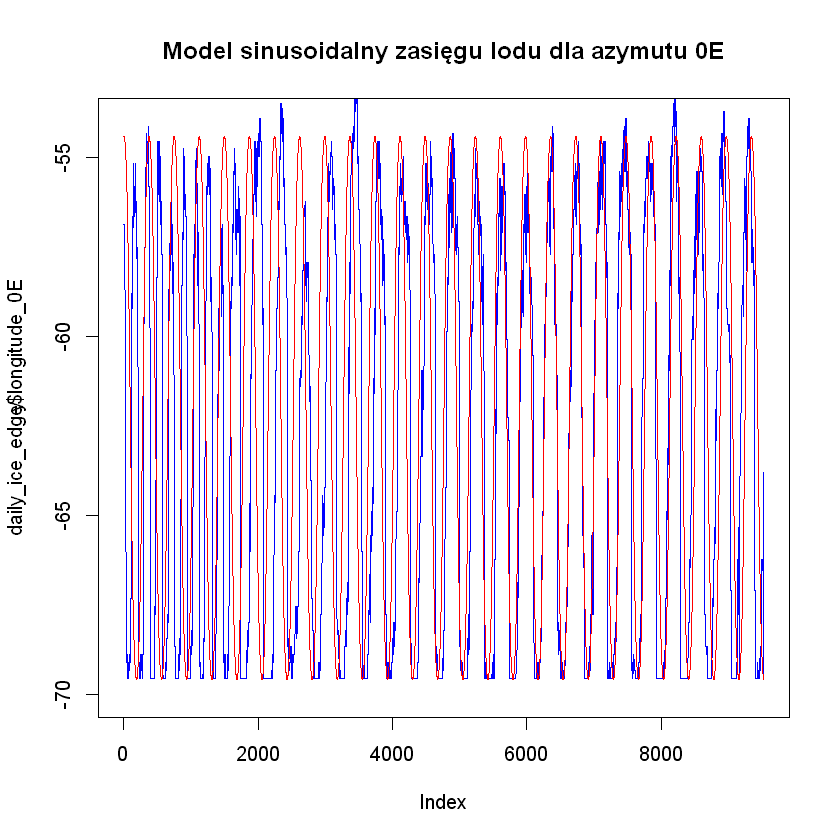

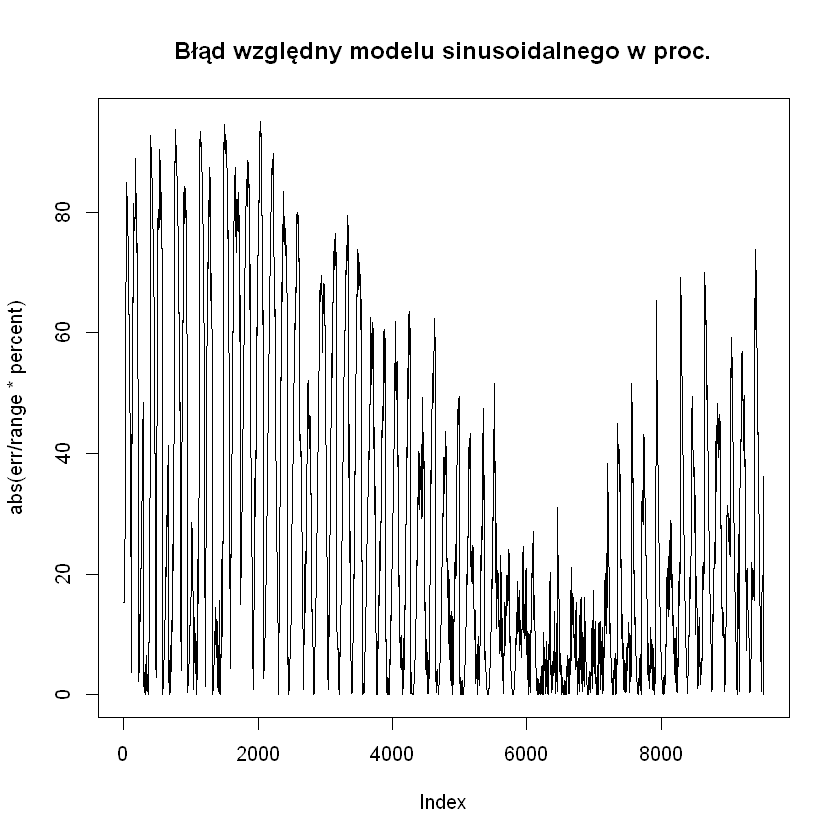

In [11]:
min_lim <- -70
max_lim <- -54

observations <- length(daily_ice_edge$longitude_0E)
t <- seq(0, pi, length.out = observations)

minims <- 51
# minims <- length(
#   which(diff(sign(diff(y))) == -2) # nolint: commented_code_linter.
# )

A <- 9 # nolint: object_name_linter.
omega <- minims
alpha <- -62
B <- 0 # nolint: object_name_linter.
C <- omega # nolint: object_name_linter.
y <- A * sin(cos(omega * t)) + B * sin(cos(C * t)) + alpha

plot(
  daily_ice_edge$longitude_0E, type = "l", col = "blue",
  ylim = c(min_lim, max_lim)
) # nolint: commented_code_linter.

par(new = TRUE) # nolint: commented_code_linter.

plot(
  y, type = "l", col = "red", ylim = c(min_lim, max_lim),
  main = "Model sinusoidalny zasięgu lodu dla azymutu 0E",
) # nolint: commented_code_linter.

range <- max_lim - min_lim
percent <- 100
err <- y - daily_ice_edge$longitude_0E

plot(
  abs(err / range * percent), type = "l",
  main = "Błąd względny modelu sinusoidalnego w proc."
)
